# Proyecto 02 del 1er Bimestre
## Analítica Presciptiva

### Tarea 1: Importación de datos, limpieza y preprocesamiento

Se debe centrar en importar los datos proporcionados en un formato adecuado para que el análisis posterior sea
más sencillo. También verificar si es necesario realizar alguna limpieza de datos y/o pasos de preprocesamiento.

1. Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import glob
import datetime
import warnings
warnings.filterwarnings('ignore')

2. Se crea la función para calcular el AQI en base a The EPA's table of breakpoints.  

|O3(ppb)|O3(ppb)|PM2.5(ug/m3)|PM10(ug/m3)|CO(ppm)|SO2(ppb)|NO2(ppb)|AQI|
|-------|-------|------------|-----------|-------|--------|--------|---|
|0–54|-|0.0–12.0|0–54|0.0–4.4|0–35|0–53|0–50|
|(8-hr)||(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)|
|55–70|-|12.1–35.4|55–154|4.5–9.4|36–75|54–100|51–100|
|(8-hr)||(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)|
|71–85|125–164|35.5–55.4|155–254|9.5–12.4|76–185|101–360|101–150|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)||
|86–105|165–204|55.5–150.4|255–354|12.5–15.4|186–304|361–649|151–200|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(1-hr)|(1-hr)||
|106–200|205–404|150.5–250.4|355–424|15.5–30.4|305–604|650–1249|201–300|
|(8-hr)|(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
|—|405–504|250.5–350.4|425–504|30.5–40.4|605–804|1250–1649|301–400|
||(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
|—|505–604|350.5–500.4|505–604|40.5–50.4|805–1004|1650–2049|401–500|
||(1-hr)|(24-hr)|(24-hr)|(8-hr)|(24-hr)|(1-hr)||
  
Fuente: https://en.wikipedia.org/wiki/Air_quality_index

  
Estos valores fueron transformados de ppb o ppm a ug/m3 en base a la siguiente tabla de conversión:

|Air Pollutant|Conversion Factor|
|-------------|-----------------|
|Sulphur dioxide (SO2)  |1 ppb = 2.62 µg/m3  |
|Nitrogen dioxide (NO2) |1 ppb = 1.88 µg/m3  |
|Carbon monoxide (CO)   |1 ppb = 1.15 µg/m3  |
|Ozone (O3)             |1 ppb = 1.96 µg/m3  |
  
Fuente: https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/

In [2]:
def calculate_aqi(concentration, pollutant):
   if pollutant == "PM10":
      breakpoints = [0, 54, 154, 254, 354, 424, 504, 604]
   elif pollutant == "SO2":
      breakpoints = [0, 91.7, 196.5, 484.7, 796.48, 1582.48, 2630.48]
   elif pollutant == "NO2":
      breakpoints = [0, 99.64, 188, 676.8, 1220.12, 2348.12, 3852.12]
   elif pollutant == "CO":
      breakpoints = [0, 5060, 10810, 14260, 17710, 34960, 57960]
   elif pollutant == "O3":
      breakpoints = [0, 105.84, 137.2, 166.6, 205.8, 392, 604]
   else:
      return "Invalid pollutant"
   
   index = [0, 50, 100, 150, 200, 300, 400, 500]

   for i in range(len(breakpoints) - 1):
      if concentration >= breakpoints[i] and concentration <= breakpoints[i + 1]:
         aqi = ((index[i + 1] - index[i]) / (breakpoints[i + 1] - breakpoints[i])) * (concentration - breakpoints[i]) + index[i]
         return round(aqi)

   return 500

3. Se los archivos csv a dataframe

In [3]:
csv_files = glob.glob('../data/PRSA_Data_20130301-20170228/*.csv')
csv_files

['../data/PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Changping_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Dingling_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Guanyuan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Gucheng_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Huairou_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Shunyi_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Tiantan_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Wanliu_20130301-20170228.csv',
 '../data/PRSA_Data_20130301-20170228\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [4]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('../data/PRSA_Data_20130301-20170228/*.csv')], ignore_index = True)

df.shape

(420768, 18)

4. Se limpian las columnas que no son necesarias.  
Se concatena year-month-day con el siguiente formato AAAA-MM-DD para manejar de mejor manera los datos para agrupar por día.

In [5]:
df = df.drop(columns=['No','PM2.5','TEMP','PRES','DEWP','RAIN','wd','WSPM'], errors='ignore')

combine_lambda = lambda x: '{}-{:02d}-{:02d}'.format(x.year, x.month, x.day)

df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)+df['hour'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d%H')
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

df = df.drop(columns=['year','month','day','hour','dateInt'], errors='ignore')

df.head(25)

,PM10,SO2,NO2,CO,O3,station,Date,date
0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01 00:00:00,2013-03-01
1,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01 01:00:00,2013-03-01
2,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03-01 02:00:00,2013-03-01
3,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03-01 03:00:00,2013-03-01
4,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03-01 04:00:00,2013-03-01
5,5.0,18.0,18.0,400.0,66.0,Aotizhongxin,2013-03-01 05:00:00,2013-03-01
6,3.0,18.0,32.0,500.0,50.0,Aotizhongxin,2013-03-01 06:00:00,2013-03-01
7,6.0,19.0,41.0,500.0,43.0,Aotizhongxin,2013-03-01 07:00:00,2013-03-01
8,6.0,16.0,43.0,500.0,45.0,Aotizhongxin,2013-03-01 08:00:00,2013-03-01
9,8.0,12.0,28.0,400.0,59.0,Aotizhongxin,2013-03-01 09:00:00,2013-03-01


5. Se verifica si hay valores nulos o NaN.

In [6]:
df.isnull().sum()

PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
station        0
Date           0
date           0
dtype: int64

6. Se limpian los valores nulos o NaN.  
Se vuelve a verificar.

In [7]:
df = df.dropna()

df.isnull().sum()

PM10       0
SO2        0
NO2        0
CO         0
O3         0
station    0
Date       0
date       0
dtype: int64

7. Con la nueva columna "date" se agrupan los datos.  
Se calcula el mean de MP10, SO2 y NO2 y el max de CO y O3.

In [8]:
df2 = df.groupby(['date','station']).agg(
    PM10=('PM10','mean'),
    SO2 = ('SO2','mean'),
    NO2 = ('NO2','mean'),
    CO = ('CO','max'),
    O3 = ('O3','max')
    ).reset_index().round(2)

df2



,date,station,PM10,SO2,NO2,CO,O3
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0
...,...,...,...,...,...,...,...
16978,2017-02-28,Nongzhanguan,24.74,7.35,35.65,1700.0,94.0
16979,2017-02-28,Shunyi,28.50,7.12,39.67,1200.0,99.0
16980,2017-02-28,Tiantan,31.15,6.85,43.25,1500.0,94.0
16981,2017-02-28,Wanliu,25.58,7.46,40.92,900.0,100.0


8. Con una función lambda se llama a la función para calcular el AQI de cada gas previamente preprocesado.

In [9]:
def calculate_aqi_df(df):
    aqi_lambda_pm10 = lambda x: calculate_aqi(x.PM10, 'PM10')
    aqi_lambda_so2 = lambda x: calculate_aqi(x.SO2, 'SO2')
    aqi_lambda_no2 = lambda x: calculate_aqi(x.NO2, 'NO2')
    aqi_lambda_co = lambda x: calculate_aqi(x.CO, 'CO')
    aqi_lambda_o3 = lambda x: calculate_aqi(x.O3, 'O3')

    df['I_PM10'] = df.apply(aqi_lambda_pm10,axis=1)
    df['I_SO2'] = df.apply(aqi_lambda_so2,axis=1)
    df['I_NO2'] = df.apply(aqi_lambda_no2,axis=1)
    df['I_CO'] = df.apply(aqi_lambda_co,axis=1)
    df['I_O3'] = df.apply(aqi_lambda_o3,axis=1)

calculate_aqi_df(df2)

df2.head(10)



,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37
5,2013-03-01,Gucheng,26.00,14.00,14.25,1200.0,61.0,24,8,7,12,29
6,2013-03-01,Huairou,14.32,18.47,12.89,800.0,91.0,13,10,6,8,43
7,2013-03-01,Nongzhanguan,10.83,9.25,27.71,600.0,89.0,10,5,14,6,42
8,2013-03-01,Shunyi,8.86,3.00,13.67,500.0,78.0,8,2,7,5,37
9,2013-03-01,Tiantan,14.46,8.88,21.58,800.0,83.0,13,5,11,8,39


9. Con los valores de AQI de cada Gas se calcula el valor Final de AQI.

In [10]:
df2['AQI'] = df2[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']].max(axis=1)

df2

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36,36
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44,44
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40,40
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43,43
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978,2017-02-28,Nongzhanguan,24.74,7.35,35.65,1700.0,94.0,23,4,18,17,44,44
16979,2017-02-28,Shunyi,28.50,7.12,39.67,1200.0,99.0,26,4,20,12,47,47
16980,2017-02-28,Tiantan,31.15,6.85,43.25,1500.0,94.0,29,4,22,15,44,44
16981,2017-02-28,Wanliu,25.58,7.46,40.92,900.0,100.0,24,4,21,9,47,47


10. Con el valor Final de AQI se añade el Nivel de Contaminación del Aire.

In [11]:
niveles = [0,50,100,150,200,250,300,600]
labels = ['Excelent','Good','Slightly Polluted','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted']

df2['AIR_LEVEL'] = pd.cut(df2.AQI,niveles,labels=labels)

df2.head(20)

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI,AIR_LEVEL
0,2013-03-01,Aotizhongxin,10.75,11.71,22.58,700.0,77.0,10,6,11,7,36,36,Excelent
1,2013-03-01,Changping,18.96,16.04,15.33,700.0,94.0,18,9,8,7,44,44,Excelent
2,2013-03-01,Dingling,7.25,3.00,2.62,300.0,84.0,7,2,1,3,40,40,Excelent
3,2013-03-01,Dongsi,10.67,8.71,29.57,700.0,92.0,10,5,15,7,43,43,Excelent
4,2013-03-01,Guanyuan,11.67,8.50,28.50,600.0,79.0,11,5,14,6,37,37,Excelent
5,2013-03-01,Gucheng,26.00,14.00,14.25,1200.0,61.0,24,8,7,12,29,29,Excelent
6,2013-03-01,Huairou,14.32,18.47,12.89,800.0,91.0,13,10,6,8,43,43,Excelent
7,2013-03-01,Nongzhanguan,10.83,9.25,27.71,600.0,89.0,10,5,14,6,42,42,Excelent
8,2013-03-01,Shunyi,8.86,3.00,13.67,500.0,78.0,8,2,7,5,37,37,Excelent
9,2013-03-01,Tiantan,14.46,8.88,21.58,800.0,83.0,13,5,11,8,39,39,Excelent


### Tarea 2: Análisis exploratorio de datos

Resumir y visualizar los datos de las formas útiles. Los estudiantes deben pensar en preguntas interesantes que
se podrían comprobar con los datos disponibles y dar respuestas textuales o mediante visualización de datos.

11. Se importa librerias para graficar.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.set_index('date', inplace=True)
df.head()

,PM10,SO2,NO2,CO,O3,station,Date
date,,,,,,,
2013-03-01,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01 00:00:00
2013-03-01,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01 01:00:00
2013-03-01,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03-01 02:00:00
2013-03-01,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03-01 03:00:00
2013-03-01,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03-01 04:00:00


12. Se gráfica los valores atípicos de los gases por Estación "station".

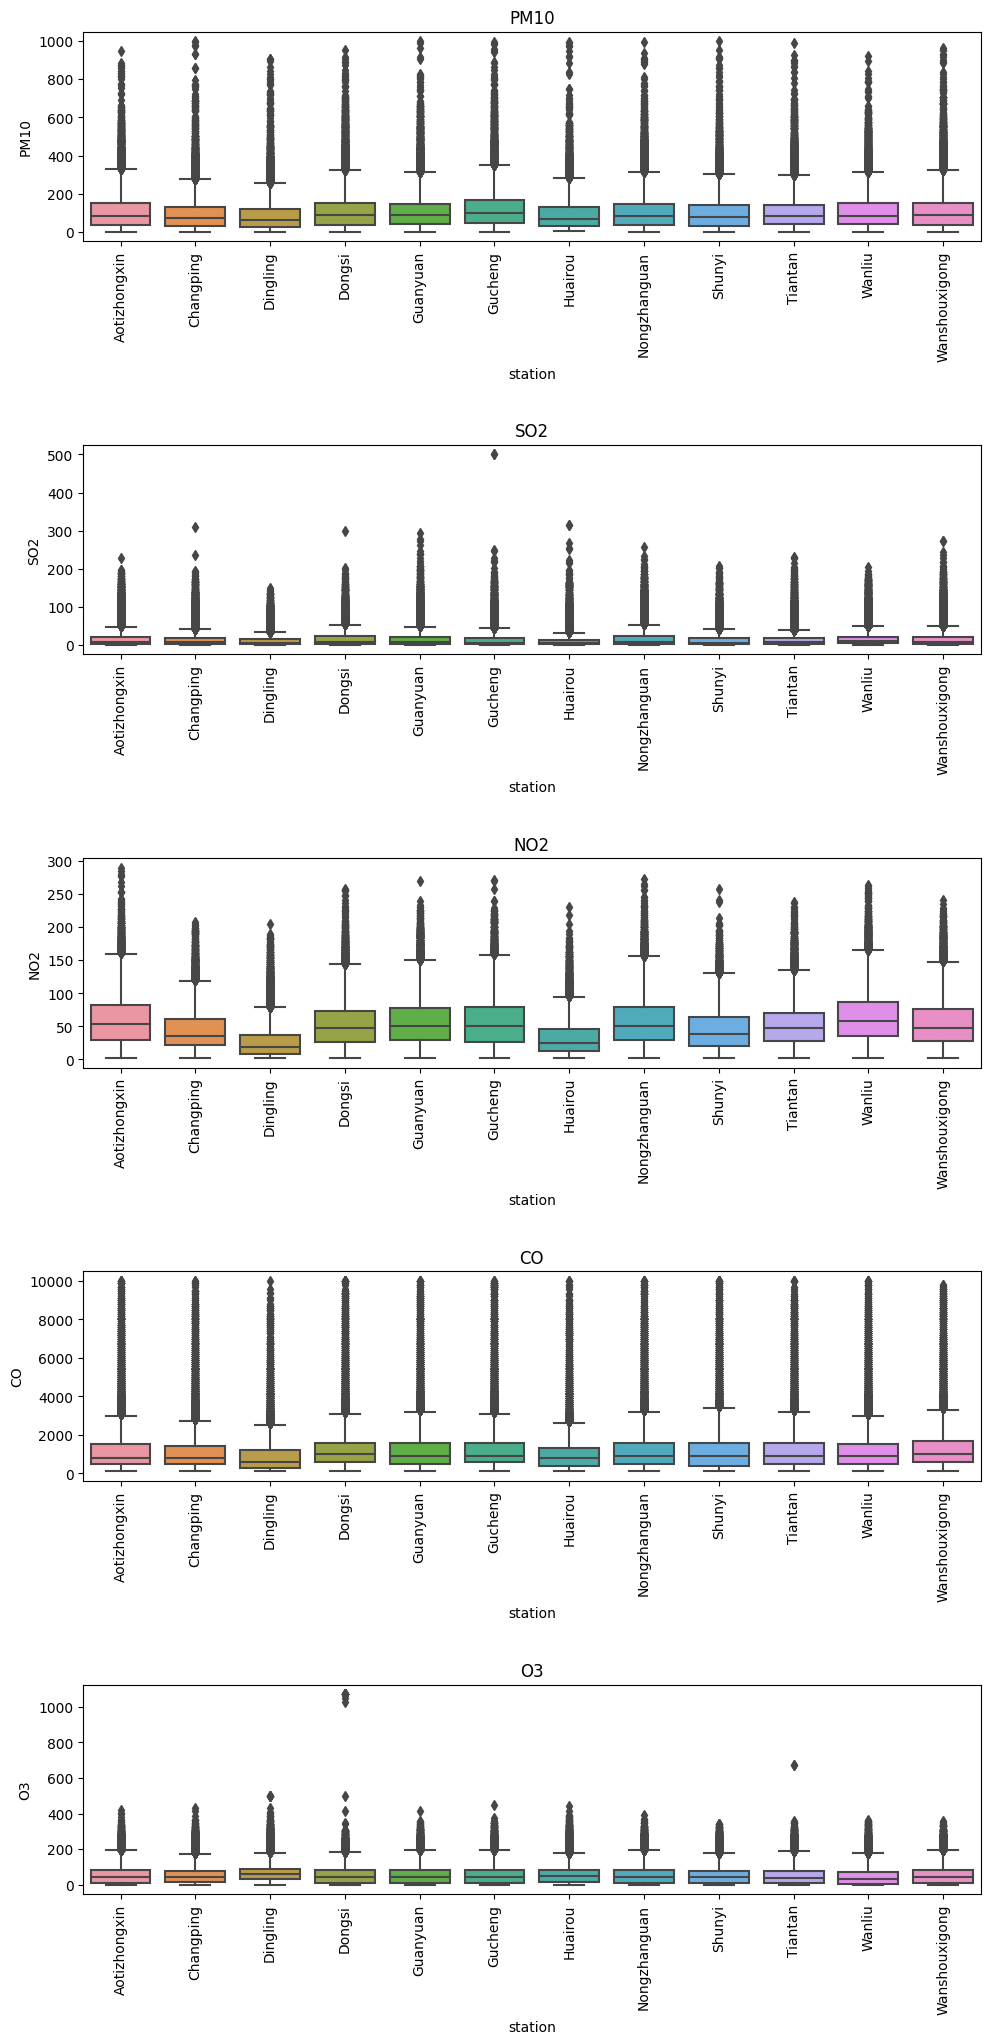

In [14]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['PM10','SO2','NO2','CO','O3']):
    plt.subplot(5,2,number*2+1)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(x=df['station'],y=df[col])

### Tarea 3: Modelado predictivo

Se debe definir una tarea predictiva que pueda ayudar a predecir la contaminación del aire, a través del valor del
AQI o del Nivel de Contaminación del Aire, en función de sus características. Después de definir la tarea, se debe
utilizar los datos disponibles para seleccionar y obtener un buen modelo para esta tarea. Se debe justificar el
modelo sugerido.

13. Se obtiene un nuevo dataframe filtrando por la ciudad Aotizhongxin. Esto para tener la data para el modelo predictivo

In [15]:
df_final = df2[df2['station'] == 'Aotizhongxin']

14. Se divide el conjunto de datos en data de entrenamiento y prueba.  
Como variables independientes se escogió los AQI de cada gas y como variable dependiente el Nivel de Contaminación del Aire.

In [16]:
from sklearn.model_selection import train_test_split

X = df_final[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']]
y = df_final['AIR_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

15. Se realiza el entrenamiento. Como se desea predecir el Nivel de Contaminación del Aire se utilizó el modelo de clasificación.

In [17]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

16. Ya entrenado el modelo se realiza la verificación por varias métricas de evaluación.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9067599067599068
Precision: 0.9067599067599068
Recall: 0.9067599067599068
F1 Score: 0.9067599067599067


17. De igual forma se valida a traves de cross_validation.

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.94055944 0.87762238 0.92982456 0.9122807  0.89473684]
Average Accuracy: 0.9110047846889952


18. Se optimiza el rendimiento mediante los hiperparametros.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)
print('Best models', best_model)

Best parameters {'C': 10, 'kernel': 'rbf'}
Best models SVC(C=10)


19. Con el resultado anterior se vuelve a entrenar el módelo configurando los hiperparametros con los recomendados.

In [21]:
model_final = SVC(C=10)
model_final.fit(X_train, y_train)

y_pred = model_final.predict(X_test)

20. En nueva validación se puede observar que se tuvo un mayor porcentaje.

In [22]:
from sklearn.model_selection import cross_val_score

scores_final = cross_val_score(model_final, X, y, cv=5)
print("Cross-Validation Scores:", scores_final)
print("Average Accuracy:", scores_final.mean())

Cross-Validation Scores: [0.97202797 0.91608392 0.95087719 0.94035088 0.93333333]
Average Accuracy: 0.942534658324132


21. En el siguiente código se creó funciones para predecir el nivel del aire mediante los gases.

In [23]:
def predict_air_level(pm10,so2,no2,co,o3,mode=0):
    df_test = pd.DataFrame({
        'PM10': [pm10],
        'SO2': [so2],
        'NO2': [no2],
        'CO': [co],
        'O3': [o3]
        })
    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']].head(1)

    print(df_test)
    return model_final.predict(df_test)

def predict_air_level_df(df_test, mode=0):    
    if mode == 0:
        calculate_aqi_df(df_test)
        df_test = df_test[['I_PM10','I_SO2','I_NO2','I_CO','I_O3']]

    print(df_test)
    return model_final.predict(df_test)


22. De todo el dataset se excluye la ciudad que fue elegida para entrenar el modelo.  
También, se obtiene un valor aleatorio para comprobar con la predicción del módelo.

In [24]:
station = 'Aotizhongxin'
df_sample = df2.query('station != @station').sample()

df_sample

,date,station,PM10,SO2,NO2,CO,O3,I_PM10,I_SO2,I_NO2,I_CO,I_O3,AQI,AIR_LEVEL
15936,2016-12-03,Nongzhanguan,301.25,29.42,117.0,7000.0,17.0,174,16,60,67,8,174,Lightly Polluted


23. En el siguiente código se envía solo los valores de los gases y debería dar el mismo resultado de la muestra.

In [25]:
pm10, so2, no2, co, o3 = 105,5,13,650,119.5

df_test = df_sample[['PM10','SO2','NO2','CO','O3']]

print(df_test)

result = predict_air_level_df(df_test)
print("Predicción de nivel del aire: "+ result)

         PM10    SO2    NO2      CO    O3
15936  301.25  29.42  117.0  7000.0  17.0
       I_PM10  I_SO2  I_NO2  I_CO  I_O3
15936     174     16     60    67     8
['Predicción de nivel del aire: Lightly Polluted']


24. El siguiente codigo es para intercatuar con el modelo:
    - Se puede ingresar los valores de los gases y debe predecir el nivel del aire.

In [26]:
pm10, so2, no2, co, o3 = 169,8,15,600,98.5

df_sample_2 = pd.DataFrame({
    'PM10': [pm10],
    'SO2': [so2],
    'NO2': [no2],
    'CO': [co],
    'O3': [o3]
    })

df_test = df_sample_2[['PM10','SO2','NO2','CO','O3']]

print(df_test)

result = predict_air_level_df(df_test)
print("Predicción de nivel del aire: "+ result)

   PM10  SO2  NO2   CO    O3
0   169    8   15  600  98.5
   I_PM10  I_SO2  I_NO2  I_CO  I_O3
0     108      4      8     6    47
['Predicción de nivel del aire: Slightly Polluted']
